# iris project

In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

# read the iris.csv

In [2]:
import pandas as pd
df=pd.read_csv('iris.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [27]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# iris data set explained

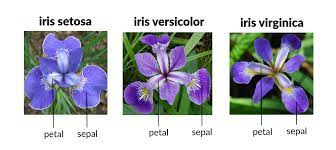

#seperate X and Y

In [8]:
X=df.drop(labels=['species'],axis=1)
Y=df[['species']]

In [12]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [13]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# apply label encoding on y

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y['species']=le.fit_transform(Y['species'])

In [15]:
Y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [17]:
Y.value_counts()

species
0          50
1          50
2          50
Name: count, dtype: int64

# save label encoder

In [18]:
import pickle
with open('LabelEnc.pkl','wb') as file:
    pickle.dump(le,file)

# perform standerd scaling on the data

In [19]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_pre=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


# save the scaler in pkl file

In [23]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

# train test split

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,test_size=0.33,random_state=42)

In [29]:
xtrain.shape

(100, 4)

In [30]:
xtest.shape

(50, 4)

# create KNN model with hyperparameter tuning

In [31]:
params={'n_neighbors':[3,4,5,6,7,8,9]}

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knnc=KNeighborsClassifier()
gscv=GridSearchCV(knnc,param_grid=params,cv=5,scoring='f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9]},
             scoring='f1_macro')

In [33]:
gscv.best_params_

{'n_neighbors': 3}

In [34]:
gscv.best_score_

0.9319552669552669

In [35]:
best_knn=gscv.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=3)

# save the model in pkl file

In [36]:
with open('model.pkl','wb') as file:
    pickle.dump(best_knn,file)

# evaluate the model

In [38]:
# accuracy in training 
best_knn.score(xtrain,ytrain)

0.95

In [39]:
# accuracy in testing
best_knn.score(xtest,ytest)

0.98

# plot the confusing matrix

In [40]:
ypred_tr=best_knn.predict(xtrain)
ypred_ts=best_knn.predict(xtest)

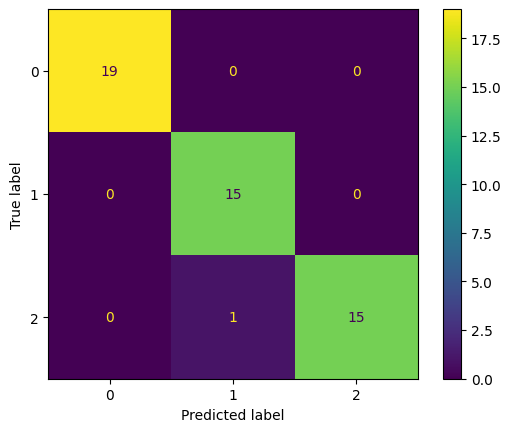

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf=confusion_matrix(ytest,ypred_ts)
cfd=ConfusionMatrixDisplay(cf,display_labels=best_knn.classes_)
cfd.plot()

# print classification report

In [42]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# checking the predictions

In [43]:
ypred_tr[0:5]

array([1, 2, 1, 0, 2])

In [48]:
ytrain.head()

,species
96,1
105,2
66,1
0,0
122,2


In [46]:
ypred_ts[0:5]

array([1, 0, 2, 1, 1])

In [47]:
ytest.head()

,species
73,1
18,0
118,2
78,1
76,1


# get the actual labels

In [49]:
ypred_tr_lb=le.inverse_transform(ypred_tr)
ypred_ts_lb=le.inverse_transform(ypred_ts)

In [51]:
ypred_tr_lb

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'virginica',
       'setosa', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicol

In [52]:
ypred_ts_lb

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica'], dtype=object)

In [53]:
xtrain.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

# predict a new datapoint

In [62]:
def predict_data(scaler,le,model):
    # take the input from user
    Sep_l= float(input('Please Enter Sepal Length   : '))
    Sep_w= float(input('please Enter Sepal Width    : '))
    Pet_l= float(input('please Enter Petal Lengeth  : '))
    Pet_w= float(input('please Enter Petal Width    : '))

    # convert above value into dataframe
    xnew=pd.DataFrame([Sep_l,Sep_w,Pet_l,Pet_w]).T
    xnew.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    print('DataFrame before preprocessing : \n')
    display(xnew)

    # preprocess the dataframe

    xnew_pre=pd.DataFrame(scaler.transform(xnew),columns=xnew.columns)
    print('DataFrame after preprocessing : \n')
    display(xnew_pre)

    #perform the prediction
    pred=model.predict(xnew_pre)

    # inverse transform using label encoder

    pred1=le.inverse_transform(pred)

    # probability

    prob=model.predict_proba(xnew_pre).max()

    # print the prediction with probability
    print('\n======================================\n')
    print(f'prediction : {pred1[0]}')
    print(f'probability : {prob:.4f}')

    return pred1[0],prob



   


In [63]:
predict_data(scaler,le,best_knn)

DataFrame before preprocessing : 



,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.4,3.8,1.1


DataFrame after preprocessing : 



,sepal_length,sepal_width,petal_length,petal_width
0,-0.41601,-1.51316,0.023872,-0.130755




prediction : versicolor
probability : 1.0000


('versicolor', 1.0)

In [64]:
predict_data(scaler,le,best_knn)

DataFrame before preprocessing : 



,sepal_length,sepal_width,petal_length,petal_width
0,6.0,3.0,4.8,1.8


DataFrame after preprocessing : 



,sepal_length,sepal_width,petal_length,petal_width
0,0.18983,-0.131979,0.592246,0.790671




prediction : virginica
probability : 0.6667


('virginica', 0.6666666666666666)

In [65]:
predict_data(scaler,le,best_knn)

DataFrame before preprocessing : 



,sepal_length,sepal_width,petal_length,petal_width
0,5.8,4.0,1.2,0.2


DataFrame after preprocessing : 



,sepal_length,sepal_width,petal_length,petal_width
0,-0.052506,2.169988,-1.453901,-1.315444




prediction : setosa
probability : 1.0000


('setosa', 1.0)